<a href="https://colab.research.google.com/github/Anjali33333/SpamDetection/blob/main/SpamDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [6]:
import io
df = pd.read_csv(io.BytesIO(uploaded['spam.csv']), encoding='latin-1')

In [8]:
df.head()



,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df = df.rename(columns={'v1': 'Label', 'v2': 'Text'})
df = df[['Label', 'Text']]

In [10]:
df['Label'] = df['Label'].map({'ham': 0, 'spam': 1})

In [11]:
df['Label'].value_counts()

,count
Label,
0,4825
1,747


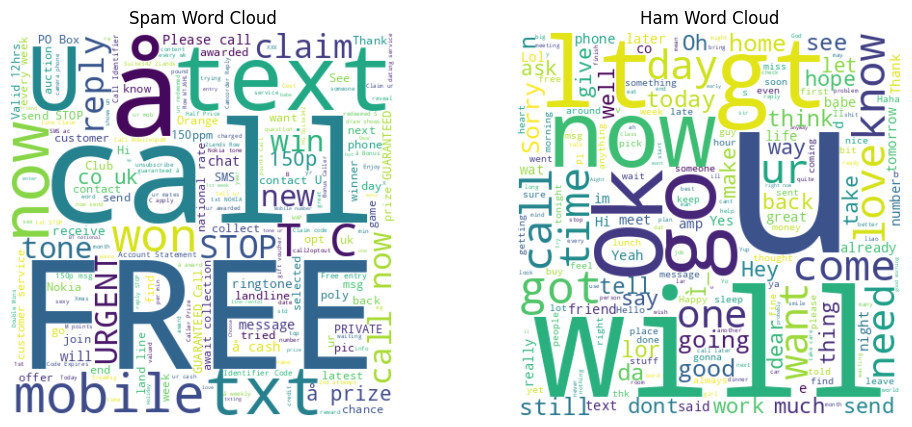

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
spam_words = ' '.join(df[df['Label'] == 1]['Text'])
ham_words = ' '.join(df[df['Label'] == 0]['Text'])
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
spam_wc = WordCloud(width=400, height=400, background_color='white').generate(spam_words)
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Spam Word Cloud')

plt.subplot(1, 2, 2)
ham_wc = WordCloud(width=400, height=400, background_color='white').generate(ham_words)
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Ham Word Cloud')

plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Label'], test_size=0.2, random_state=42)

In [23]:
bow = CountVectorizer(stop_words='english')
X_train_bow = bow.fit_transform(X_train)
X_test_bow = bow.transform(X_test)

In [24]:
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [25]:
model_bow = LogisticRegression(max_iter=200)
model_bow.fit(X_train_bow, y_train)
y_pred_bow = model_bow.predict(X_test_bow)

model_tfidf = LogisticRegression(max_iter=200)
model_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

In [26]:
print("Bag-of-Words Accuracy:", accuracy_score(y_test, y_pred_bow))
print(classification_report(y_test, y_pred_bow))

Bag-of-Words Accuracy: 0.97847533632287
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [27]:
print("TF-IDF Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))

TF-IDF Accuracy: 0.9524663677130045
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



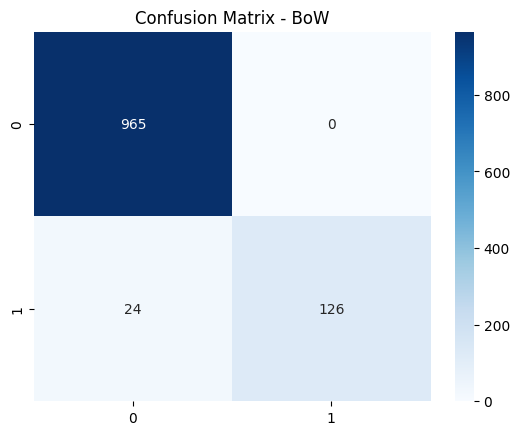

In [28]:
cm_bow = confusion_matrix(y_test, y_pred_bow)
sns.heatmap(cm_bow, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - BoW')
plt.show()

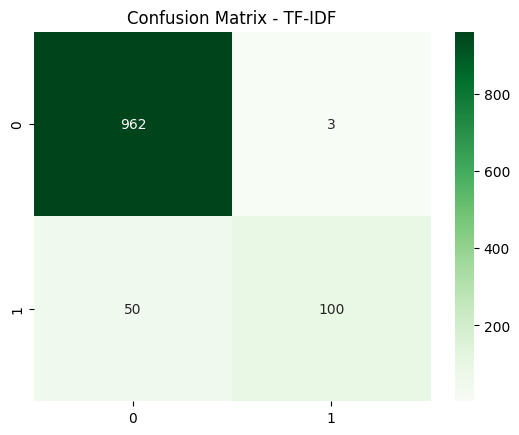

In [29]:
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - TF-IDF')
plt.show()